In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import numpy as np
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

/Users/arslanaliawan/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/arslanaliawan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv('/Users/arslanaliawan/Desktop/FilesinVS/typeofCancer/data.csv')
data.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
data.shape


(569, 33)

In [5]:
data.drop('Unnamed: 32', axis =1 ,inplace = True)

In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
data.shape

(569, 32)

In [8]:
features_mean = list(data.columns[1:11])
print (features_mean)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']


In [9]:
feature_se = list(data.columns[12:22])
print(feature_se)

['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']


In [10]:
feature_worst = list(data.columns[22:])
print(feature_worst)

['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [11]:
#lets start with the features_mean

data['diagnosis'] = data['diagnosis'].map({'M':'Malignant','B':'Benign'})

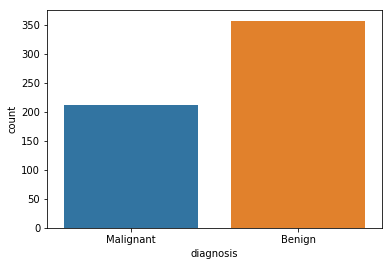

In [12]:
sns.countplot(data['diagnosis'],label = "Count" )

In [13]:

#from above graph we can see that there is a more number of bengin stage of cancer which can be cure

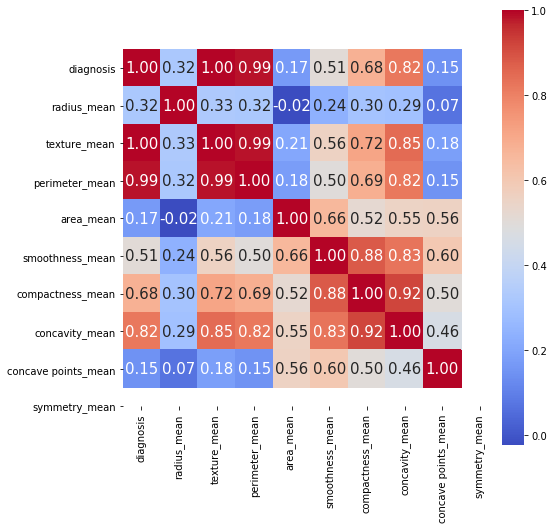

In [14]:
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

In [15]:
# observation

#     the radius, parameter and area are highly correlated as expected from their relation so from these we will use anyone of them
#     compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
#     so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean*



In [16]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [17]:
train, test = train_test_split(data,test_size = 0.3)

In [18]:
print(train.shape)
print(test.shape)

(398, 32)
(171, 32)


In [19]:
train_X = train[prediction_var]
train_y = train.diagnosis

In [20]:
test_X = test[prediction_var]
test_y = test.diagnosis

In [21]:
# Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9298245614035088

In [22]:
#Now try with SVM 

model= svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)

metrics.accuracy_score(prediction,test_y)

0.9005847953216374

In [23]:
#*Now lets do this for all feature_mean so that from Random forest we can get the feature which are important**

prediction_var = ['concave points_mean','concavity_mean','radius_mean','texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean','area_mean']
train_X = train[prediction_var]
train_y = train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis



In [24]:
# Try again with RandomForest

model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9590643274853801

In [25]:
#by the way now lets check the important features in the prediction
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

concave points_mean    0.264648
concavity_mean         0.179845
perimeter_mean         0.157300
radius_mean            0.136592
area_mean              0.101541
texture_mean           0.066555
compactness_mean       0.044719
smoothness_mean        0.028968
symmetry_mean          0.019831
dtype: float64


In [26]:
#again try with SVM with more features
model= svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)

metrics.accuracy_score(prediction,test_y)

0.7368421052631579

In [ ]:
#We can see by adding some features accuracy of the RandomForest Increases aber accuracy of the SVM decerease
#Now try to take 5 important features which displayed by random forest

In [31]:
prediction_var = ['concave points_mean','concavity_mean','radius_mean','perimeter_mean','area_mean']
train_X = train[prediction_var]
train_y = train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [32]:
#Try with Random forest now
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9415204678362573

In [33]:
#try with SVM Now
model= svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)

metrics.accuracy_score(prediction,test_y)

0.8771929824561403

In [ ]:
#as you see , their accuracy increases 
#Now do with the features_worst

In [36]:
prediction_var = feature_worst
train_X = train[prediction_var]
train_y = train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [39]:
#Try with Random forest now
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9415204678362573

In [40]:
#try with SVM Now
model= svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.672514619883041

In [ ]:
#Now we will try a cross validation

predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']


In [68]:
def model(model,data,prediction,outcome):
    kf = KFold(data.shape[0],n_folds=10)

In [69]:
 #I will First use cross validation with different model
# then I will explain about how to to tune the parameter of models using gridSearchCV 

In [70]:
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
    predictions = model.predict(data[prediction_input])
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(data.shape[0], n_folds=5)

    error = []
    for train, test in kf:

        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
    
        
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    

In [71]:
model = DecisionTreeClassifier()
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var= "diagnosis"
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 83.333%
Cross-Validation Score : 86.404%
Cross-Validation Score : 88.596%
Cross-Validation Score : 89.693%
Cross-Validation Score : 89.984%


In [72]:
#Accuracy is 100 % means over fitting
#but cross validation scores are not good 3 so accuracy cant be considered only factor here

In [73]:
model = svm.SVC()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 96.661%
Cross-Validation Score : 56.140%
Cross-Validation Score : 65.789%
Cross-Validation Score : 69.883%
Cross-Validation Score : 72.807%
Cross-Validation Score : 74.706%


In [74]:
model = RandomForestClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 98.594%
Cross-Validation Score : 80.702%
Cross-Validation Score : 85.965%
Cross-Validation Score : 89.474%
Cross-Validation Score : 91.009%
Cross-Validation Score : 91.391%


In [75]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 90.510%
Cross-Validation Score : 76.316%
Cross-Validation Score : 80.263%
Cross-Validation Score : 85.965%
Cross-Validation Score : 86.623%
Cross-Validation Score : 86.820%


In [76]:
model = LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 89.279%
Cross-Validation Score : 78.070%
Cross-Validation Score : 82.018%
Cross-Validation Score : 86.550%
Cross-Validation Score : 87.939%
Cross-Validation Score : 89.112%
